# Многослойная нейронная сеть

Задача обучения "девочки" выбора парня по трём критериям

In [2]:
%%capture
%pip install tensorflow

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

2024-10-31 09:47:45.738989: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-31 09:47:45.740951: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-31 09:47:45.744280: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-31 09:47:45.753306: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730368065.768480   28874 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730368065.77

In [4]:
# Создаем обучающую выборку: 4 примера с тремя входными признаками и метками
# Входные данные: [квартира, красота, любовь к тяжелому року]
X_train = np.array([
    [1, 1, 1],   # Парень имеет квартиру, красивый, не любит тяжелый рок
    [1, -1, 1],  # Парень имеет квартиру, некрасивый, не любит тяжелый рок
    [-1, 1, -1], # Парень не имеет квартиры, красивый, любит тяжелый рок
    [-1, -1, -1] # Парень не имеет квартиры, некрасивый, любит тяжелый рок
])

In [5]:
# Метки: 1 - подходит, 0 - не подходит
y_train = np.array([1, 1, 0, 0])

In [6]:
# Создаем модель
model = Sequential()
model.add(Dense(2, input_dim=3, activation='relu'))  # Первый слой с 2 нейронами и активацией ReLU
model.add(Dense(1, activation='sigmoid'))            # Выходной слой с 1 нейроном и сигмоидной активацией

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-10-31 09:47:48.071975: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [7]:
# Компилируем модель
model.compile(optimizer=SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Обучаем модель и записываем историю
history = model.fit(X_train, y_train, epochs=100, verbose=0)

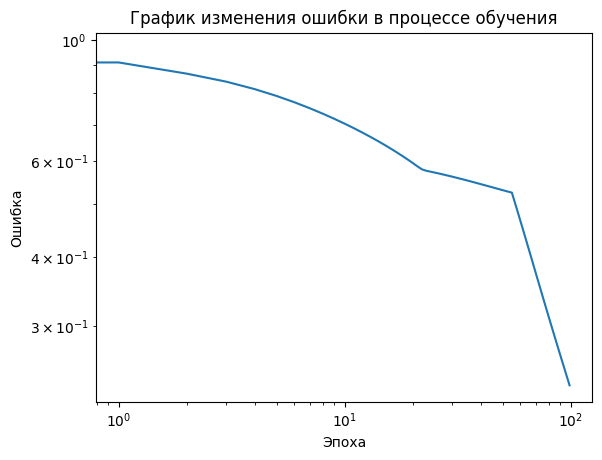

In [9]:
# График изменения ошибки (потерь) в процессе обучения
plt.plot(history.history['loss'])
plt.title('График изменения ошибки в процессе обучения')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [10]:
# Проверим работу обученной модели
predictions = (model.predict(X_train) > 0.5).astype(int)
print("Предсказания (1 - подходит, 0 - не подходит):")
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Предсказания (1 - подходит, 0 - не подходит):
[[1]
 [1]
 [0]
 [0]]


In [12]:
# Посмотрим веса и смещения для каждого слоя
for i, layer in enumerate(model.layers):
    W, O = layer.get_weights()  # Получаем веса и смещения для слоя
    print(f"Слой {i + 1} — Веса:\n{W}")
    print(f"Слой {i + 1} — Смещения:\n{O}\n")

Слой 1 — Веса:
[[ 0.8424837   0.12121238]
 [-0.67784035 -0.23427562]
 [ 1.1544008  -0.15991303]]
Слой 1 — Смещения:
[ 0.47131357 -0.2834712 ]

Слой 2 — Веса:
[[1.5106562 ]
 [0.66528463]]
Слой 2 — Смещения:
[-0.7555802]

